# EDA 탐색적 분석_1

In [141]:
#함수 호출
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
#한글 폰트 호출
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgunsl.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
#matplotlib.rc('font', family=font_name)
rc('font', family=font_name)



# import matplotlib.font_manager as fm
#  plt.rcParams['font.family'] = 'NanumGothic'
# fm.get_fontconfig_fonts()
# font_location = '/Library/Fonts/NanumBarunGothicBold.ttf'
# font_name = fm.FontProperties(fname=font_location).get_name()
# plt.rc('font', family=font_name)

In [143]:
#csv 파일 호출
df = pd.read_csv('./data/20200101_seoul_2014_to_2018_crime_cctv_pop_food_sum.csv')
display(df.head(10))
df.info()

,년도,지역,강도,살인,절도,폭력,강간강제추행,살인강간,강도절도폭력,범죄합계,10만명당범죄수,한국인,등록외국인,세대,인구합계,CCTV,10만명당CCTV수,단란주점,유흥주점,단란유흥
0,2014,강남구,37,13,3895,4394,512,525,8326,8851,1534,571509,5359,234324,576868,430,74,328,276,604
1,2014,강동구,10,5,2425,2804,148,153,5239,5392,1113,479586,4605,186239,484191,59,12,105,151,256
2,2014,강북구,21,6,1494,2320,189,195,3835,4030,1186,336363,3308,141139,339671,74,21,129,74,203
3,2014,강서구,9,8,2341,2717,214,222,5067,5289,907,576574,6331,230553,582906,230,39,169,114,283
4,2014,관악구,25,7,3029,3359,361,368,6413,6781,1270,515688,18120,248703,533809,487,91,100,228,328
5,2014,광진구,16,8,3167,2828,249,257,6011,6268,1651,365993,13493,159134,379486,87,22,89,19,108
6,2014,구로구,14,3,2377,2743,252,255,5134,5389,1179,427022,29736,172682,456758,187,40,100,40,140
7,2014,금천구,9,7,1552,2112,162,169,3673,3842,1488,239510,18669,104002,258180,101,39,84,60,144
8,2014,노원구,8,5,2404,2722,173,178,5134,5312,901,585599,3474,221580,589074,80,13,57,28,85
9,2014,도봉구,11,6,1350,1585,172,178,2946,3124,873,355829,2003,137382,357832,185,51,56,21,77


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 20 columns):
년도            125 non-null int64
지역            125 non-null object
강도            125 non-null int64
살인            125 non-null int64
절도            125 non-null int64
폭력            125 non-null int64
강간강제추행        125 non-null int64
살인강간          125 non-null int64
강도절도폭력        125 non-null int64
범죄합계          125 non-null int64
10만명당범죄수      125 non-null int64
한국인           125 non-null int64
등록외국인         125 non-null int64
세대            125 non-null int64
인구합계          125 non-null int64
CCTV          125 non-null int64
10만명당CCTV수    125 non-null int64
단란주점          125 non-null int64
유흥주점          125 non-null int64
단란유흥          125 non-null int64
dtypes: int64(19), object(1)
memory usage: 19.6+ KB


In [144]:
#결측치 처리
#df['년도'].fillna(method='ffill' ,inplace=True)

#'년도'컬럼 형변환 - float->int->str
#df['년도'] = df['년도'].astype(int)

#서울지역 리스트 생성
seoul_area = list(set(df['지역']))

#피벗테이블로 변환
df = df.pivot_table(index=['지역','년도'])
#df.sortlevel(sort_remaining=False)
#print(df)
print(seoul_area)
display(df)

#조회
# for i in seoul_area:
#     print(i)
#     print(df.loc[(i)])

['중랑구', '동대문구', '마포구', '광진구', '양천구', '강남구', '동작구', '강서구', '강북구', '노원구', '도봉구', '서대문구', '서초구', '관악구', '성동구', '영등포구', '성북구', '용산구', '은평구', '송파구', '종로구', '구로구', '강동구', '중구', '금천구']


10만명당CCTV수  10만명당범죄수  CCTV  강간강제추행  강도  강도절도폭력  단란유흥  단란주점  등록외국인  \
지역   년도                                                                        
강남구  2014          74      1534   430     512  37    8326   604   328   5359   
     2015         167      1480   976     449  21    8155   582   313   5325   
     2016         302      1415  1741     516  39    7628   556   301   5084   
     2017         409      1362  2318     607  20    7106   520   287   4929   
     2018         501      1362  2766     600  14    6903   477   266   4978   
강동구  2014          12      1113    59     148  10    5239   256   105   4605   
     2015          43      1117   203     156   6    5084   250   103   4703   
     2016          87       982   397     160  14    4298   214    81   4450   
     2017         149       950   670     172  10    4084   238    95   4140   
     2018         242       899  1055     170   7    3746   224    91   4283   
강북구  2014          21      1186    74     189  21    3835   203   129   3308   
     2015          65      1265   219     153  14    4097   200   129   3478   
     2016         142      1272   473     217   5    4005   200   128   3512   
     2017         143      1030   474     208   7    3177   201   127   3490   
     2018         243      1056   793     188   7    3241   200   126   3694   
강서구  2014          39       907   230     214   9    5067   283   169   6331   
     2015          70       938   417     262  13    5316   287   168   6575   
     2016         101       909   607     275  10    5166   282   165   6607   
     2017         143       846   871     316   4    4808   301   168   6518   
     2018         185       763  1125     269   6    4349   304   171   6675   
관악구  2014          91      1270   487     361  25    6413   328   100  18120   
     2015         206      1194  1096     320  12    6016   312    94  19202   
     2016         324      1074  1715     322  12    5350   313    94  18947   
     2017         460      1055  2409     379   7    5138   314    94  17783   
     2018         590       963  3080     352  10    4665   305    93  17892   
광진구  2014          22      1651    87     249  16    6011   108    89  13493   
     2015          40      1570   151     240  14    5665   104    87  14520   
     2016          46      1424   172     279  11    5039   105    87  14820   
     2017         171      1248   640     261  13    4379   104    86  14673   
     2018         265      1055   986     229   2    3679   104    86  14941   
...               ...       ...   ...     ...  ..     ...   ...   ...    ...   
영등포구 2014          51      1658   217     250  10    6739   463   277  37696   
     2015         138      1633   583     295  22    6558   448   269  39556   
     2016         211      1532   872     356  19    5953   435   262  37358   
     2017         308      1483  1243     455   5    5499   427   256  33817   
     2018         504      1445  2036     391   8    5432   367   208  35331   
용산구  2014          42      1515   107     213   7    3585   156   121  12815   
     2015          83      1533   209     194  14    3621   151   118  14422   
     2016         120      1678   298     251   9    3882   145   115  14715   
     2017         146      1663   358     327   5    3732   136   106  14884   
     2018         175      1391   431     331   3    3079   137   108  15714   
은평구  2014          67      1075   343     188  24    5238   224   141   4567   
     2015         103       941   523     166   9    4576   233   150   4635   
     2016         164       902   819     156   9    4339   226   149   4514   
     2017         212       788  1048     230   4    3647   215   138   4422   
     2018         289       734  1415     188   1    3394   219   137   4413   
종로구  2014          79      3017   132     226  12    4792   360   136   8031   
     2015         198      2860   327     211  11    4488   359   136   8754   
     2016  

In [62]:
df.loc['강남구']

,10만명당CCTV수,10만명당범죄수,CCTV,강간강제추행,강도,강도절도폭력,단란유흥,단란주점,등록외국인,범죄합계,살인,살인강간,세대,유흥주점,인구합계,절도,폭력,한국인
년도,,,,,,,,,,,,,,,,,,
2014,74,1534,430,512,37,8326,604,328,5359,8851,13,525,234324,276,576868,3895,4394,571509
2015,167,1480,976,449,21,8155,582,313,5325,8617,13,462,237556,269,582206,3850,4284,576881
2016,302,1415,1741,516,39,7628,556,301,5084,8149,5,521,235329,255,575597,3587,4002,570512
2017,409,1362,2318,607,20,7106,520,287,4929,7720,7,614,233311,233,566427,3130,3956,561497
2018,501,1362,2766,600,14,6903,477,266,4978,7513,10,610,229509,211,551615,3004,3885,546637


In [145]:
#자치구 별로 csv파일로 추출
for i in seoul_area:
    df.loc[(i)].to_csv('./seoul/'+i+'.csv',encoding='cp949')

## 1.강남구 분석

In [64]:
gdf = pd.read_csv('./seoul/강남구.csv', encoding='cp949',index_col='년도')
idf = pd.read_csv('./seoul/강남구.csv', encoding='cp949')

gdf.columns

Index(['10만명당CCTV수', '10만명당범죄수', 'CCTV', '강간강제추행', '강도', '강도절도폭력', '단란유흥',
       '단란주점', '등록외국인', '범죄합계', '살인', '살인강간', '세대', '유흥주점', '인구합계', '절도', '폭력',
       '한국인'],
      dtype='object')

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


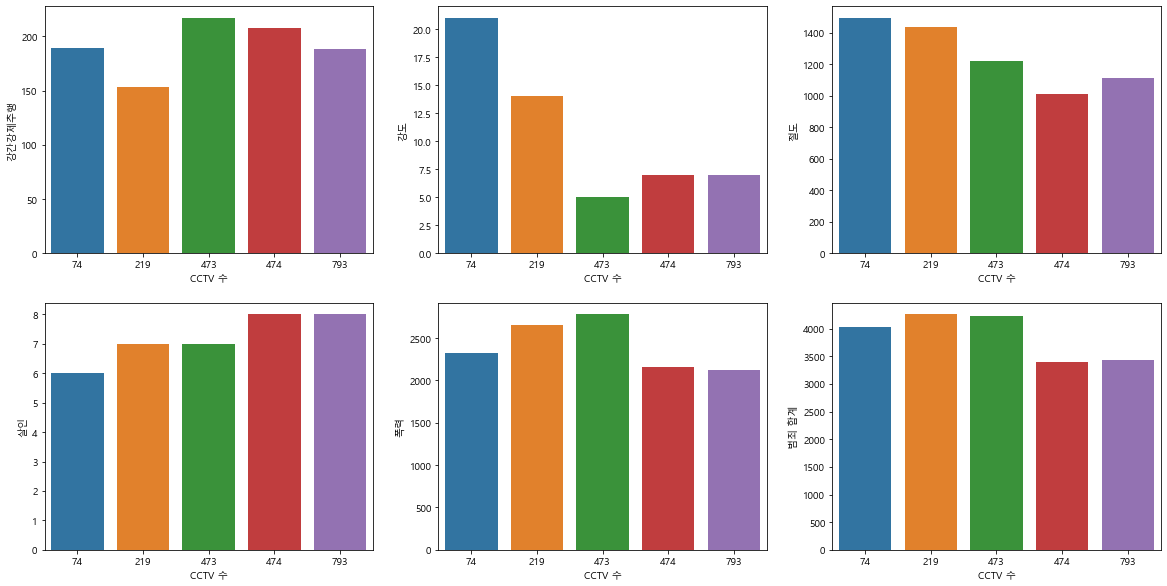

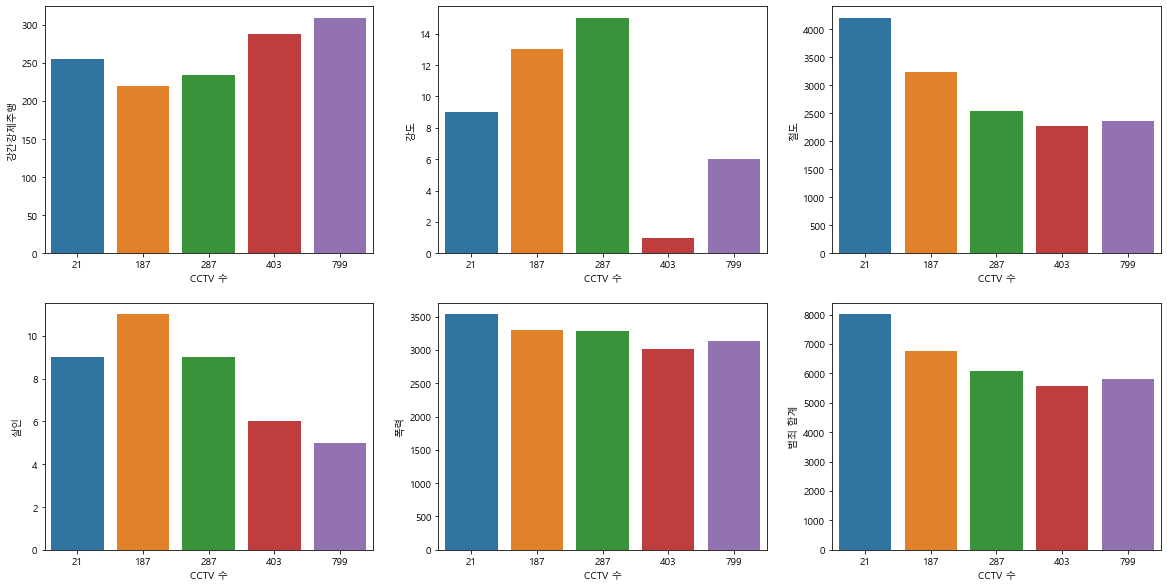

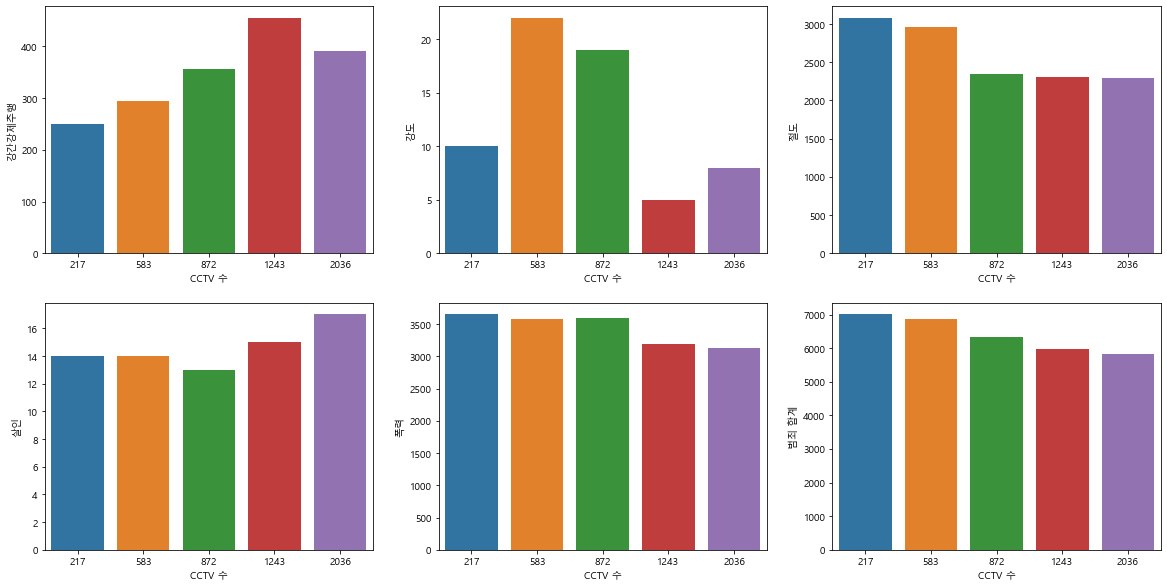

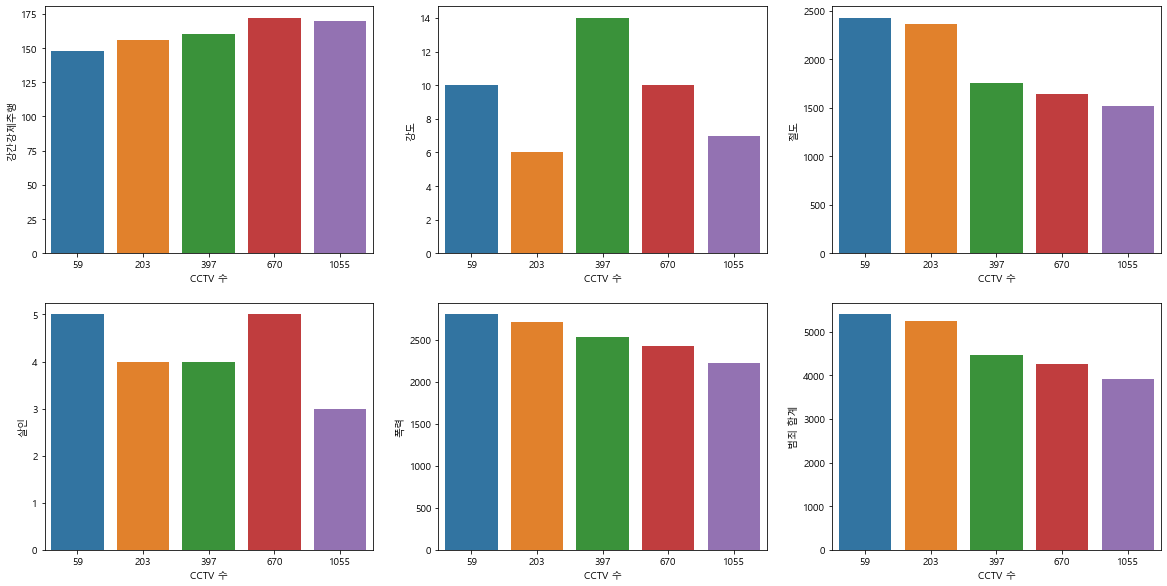

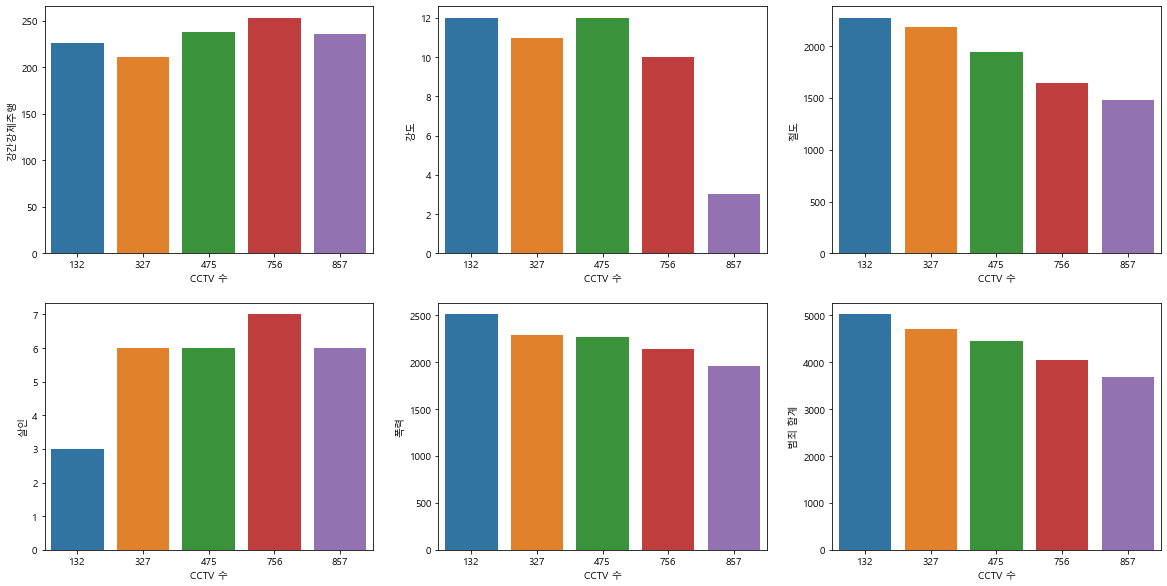

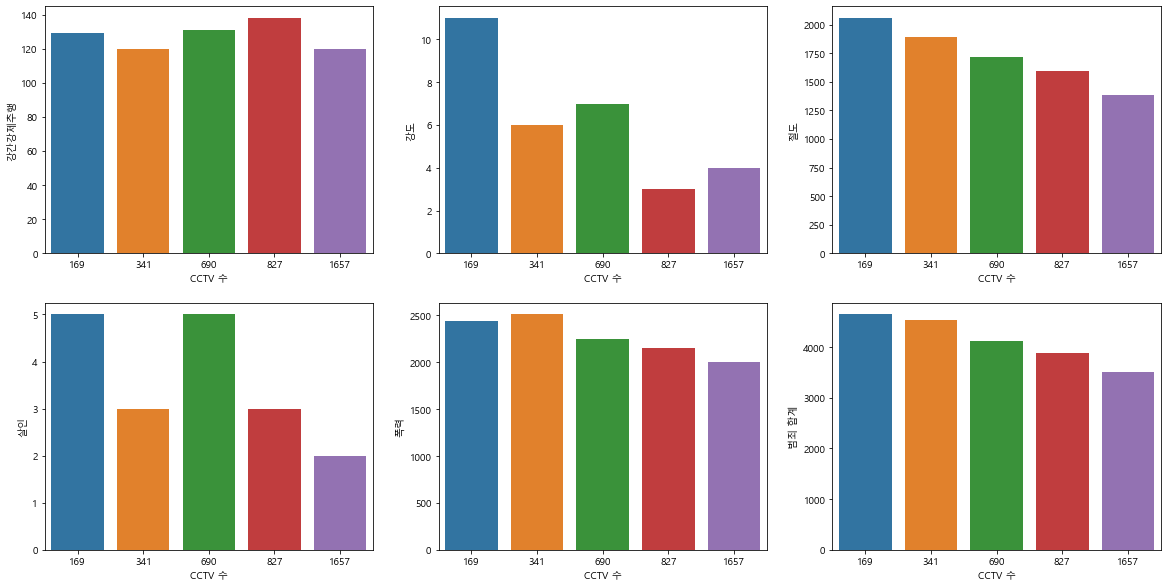

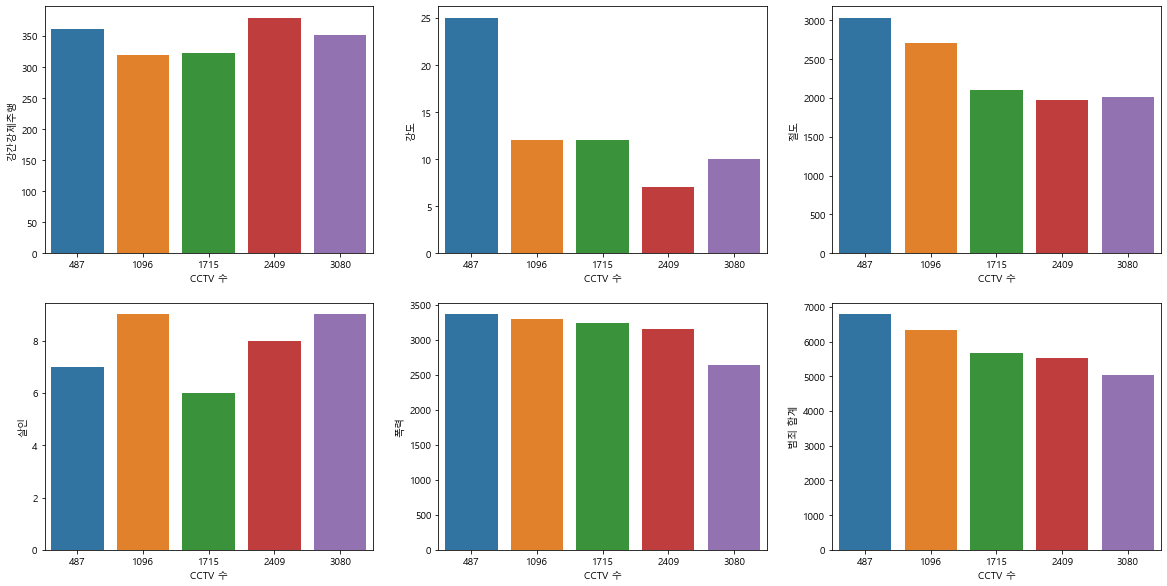

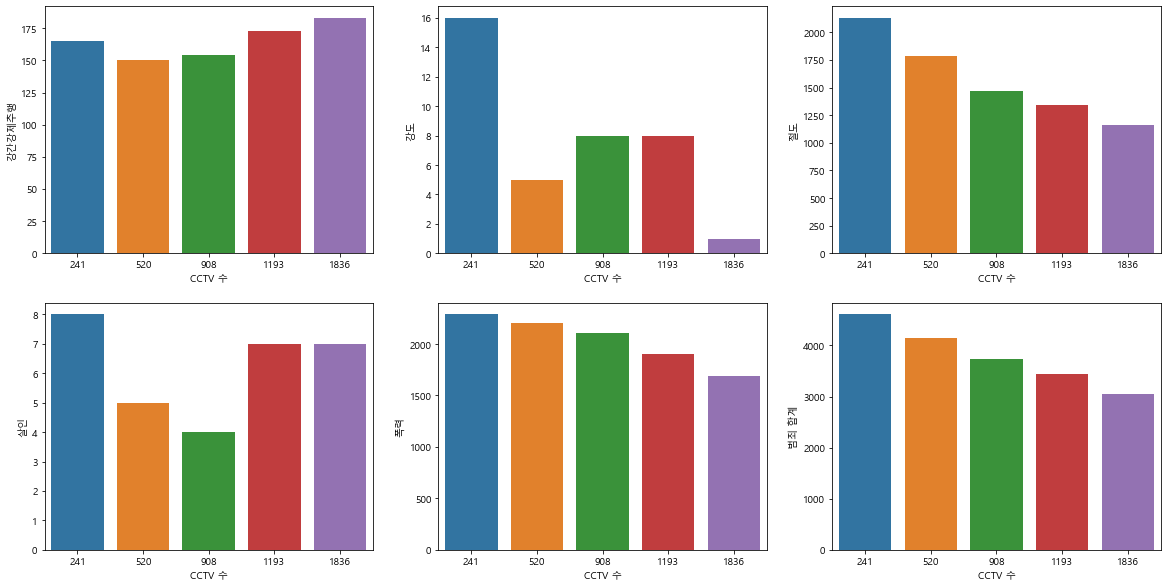

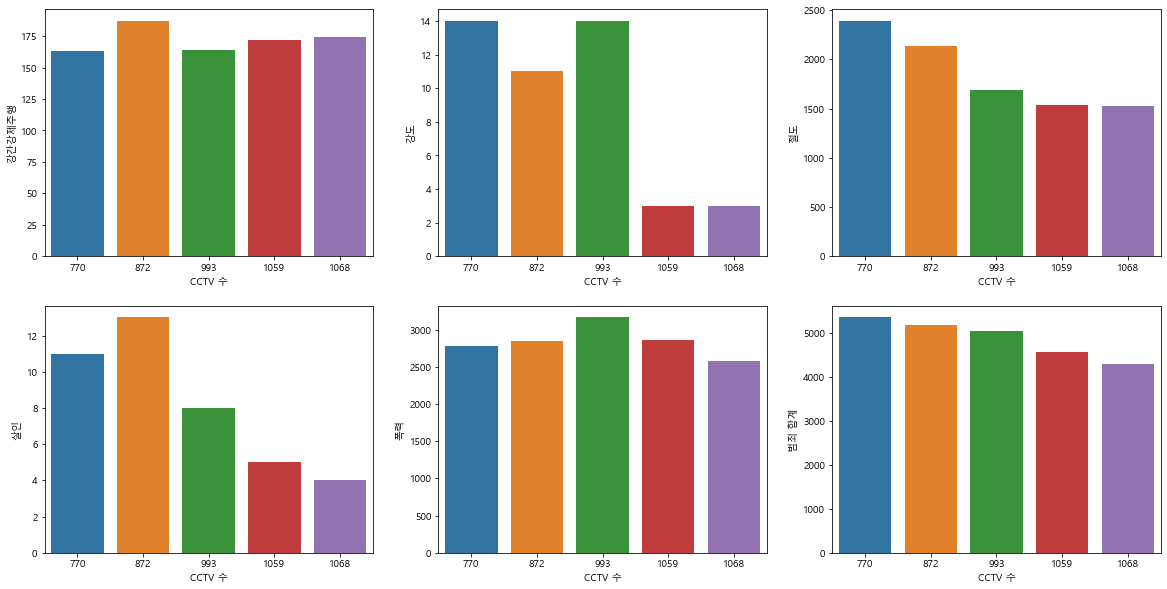

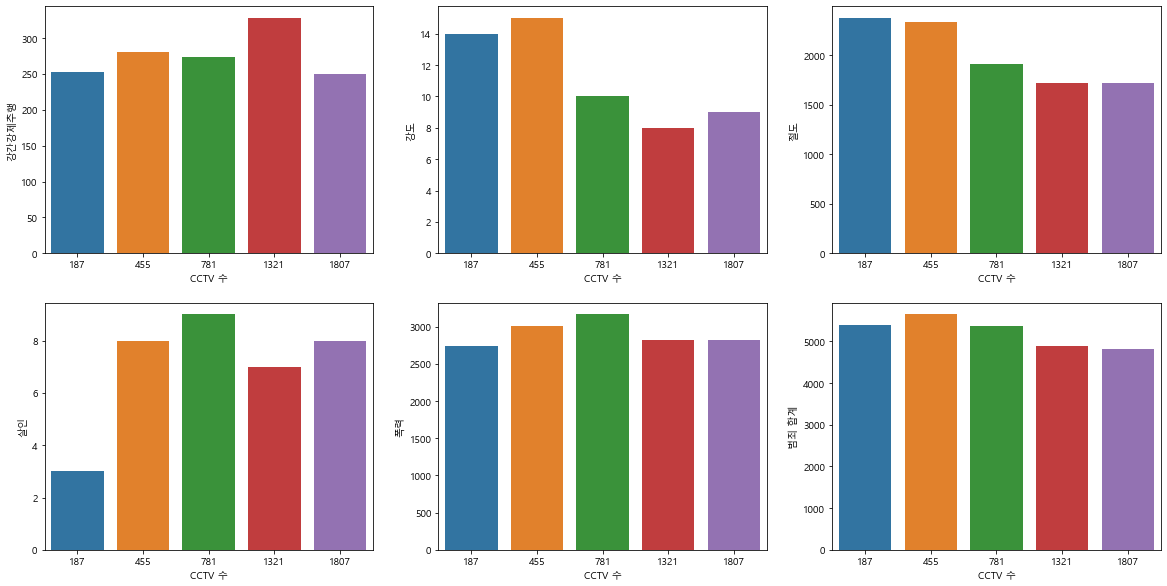

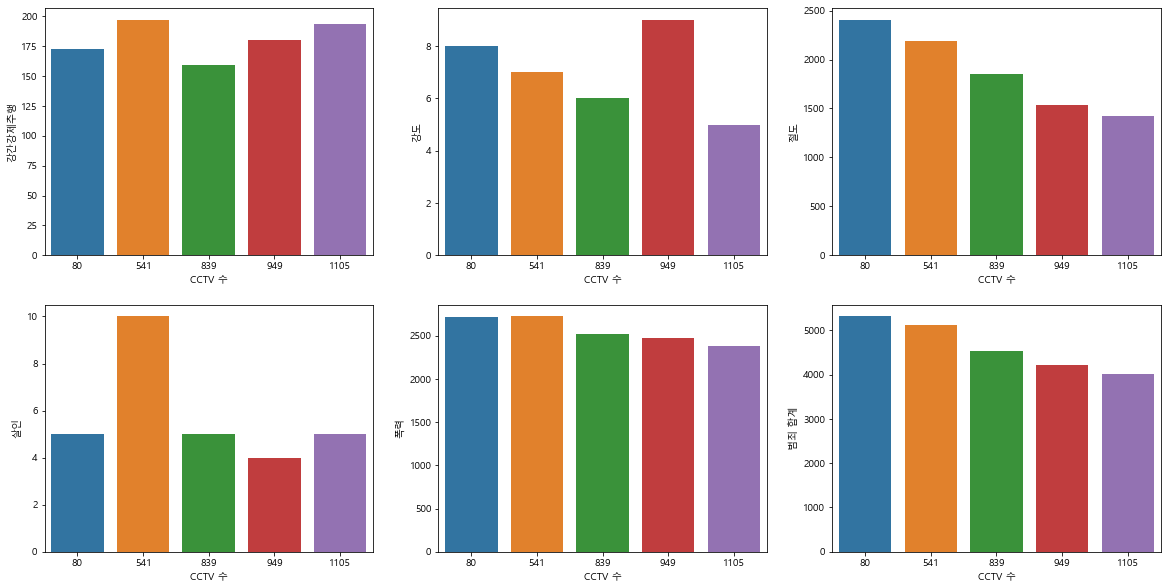

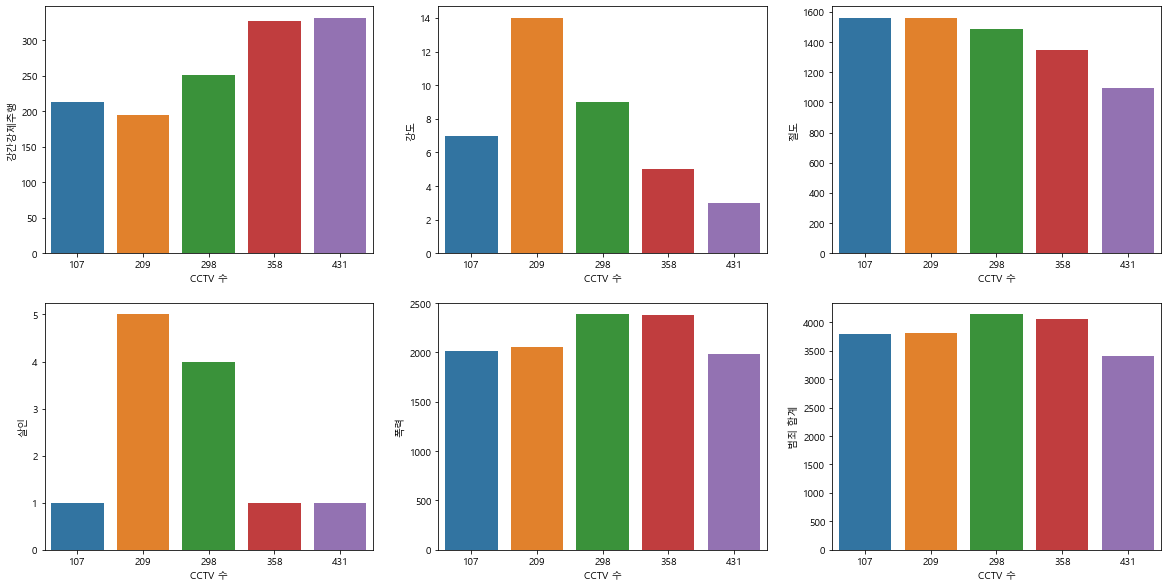

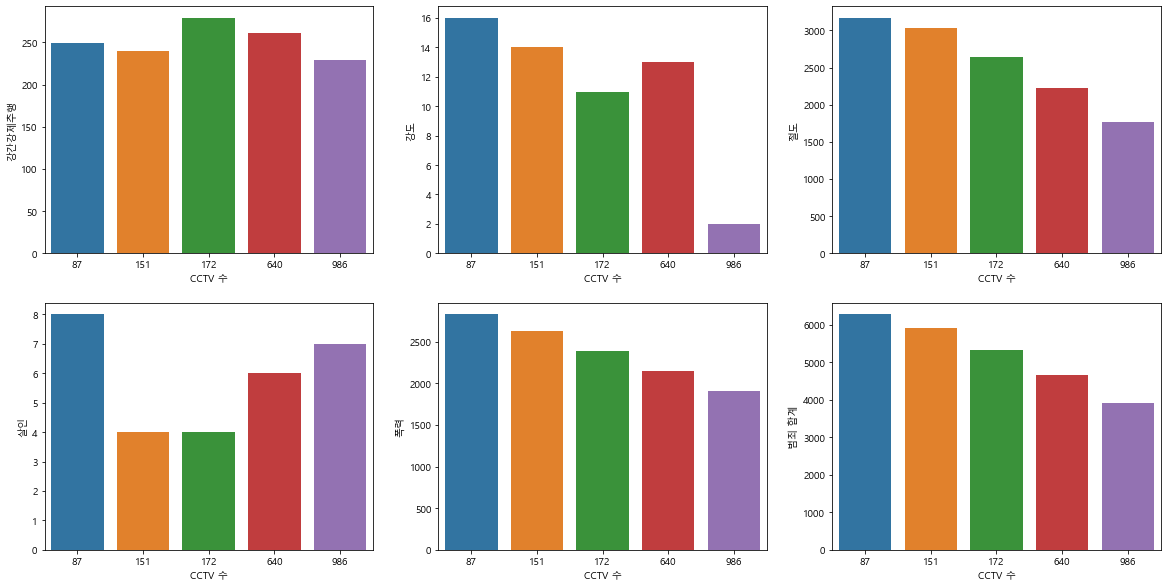

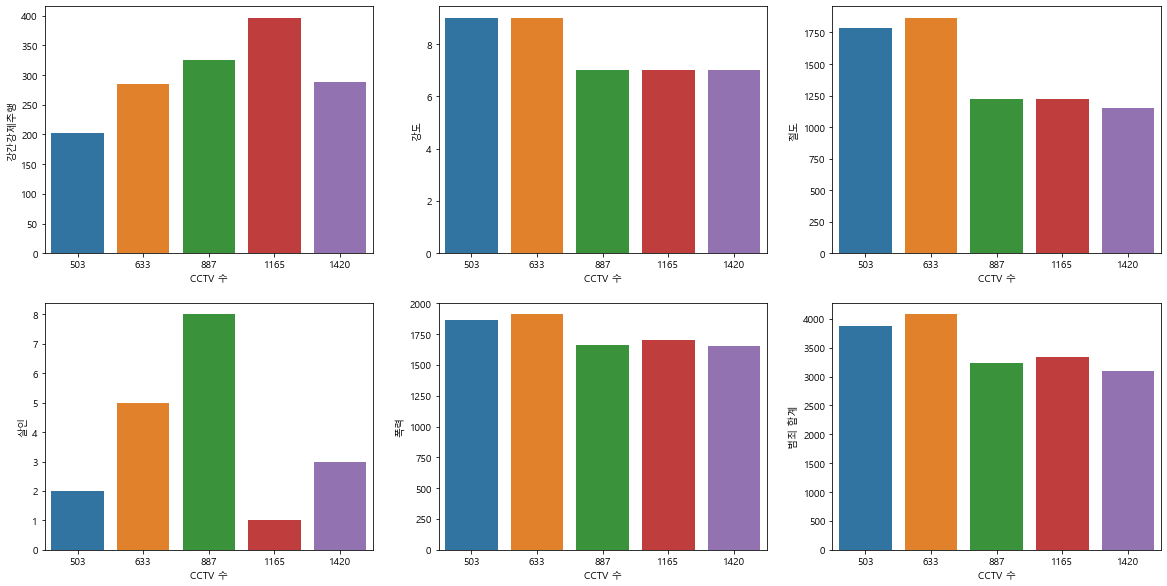

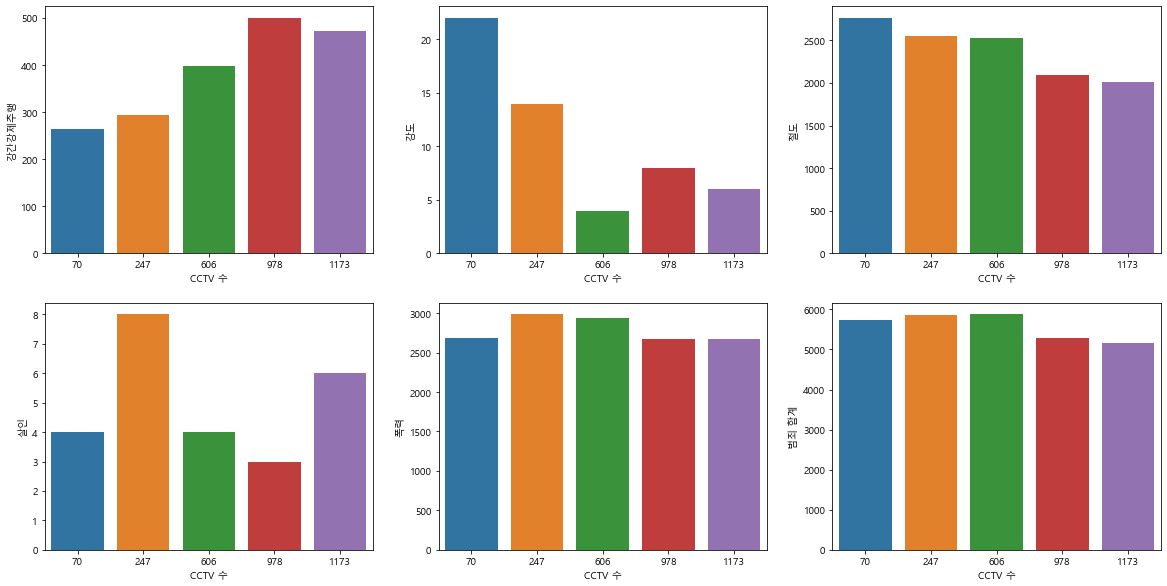

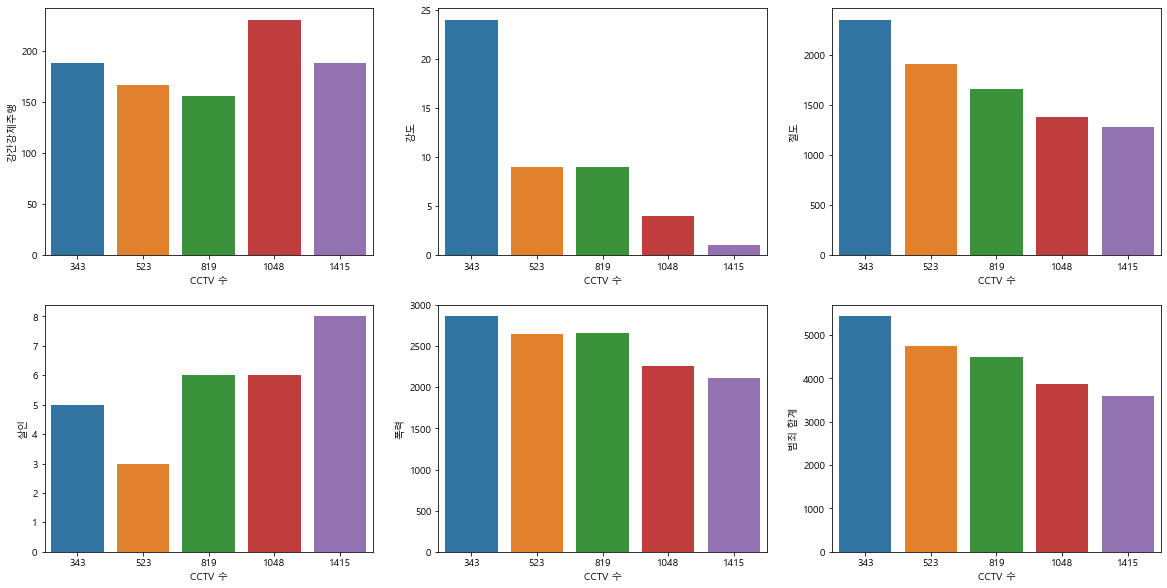

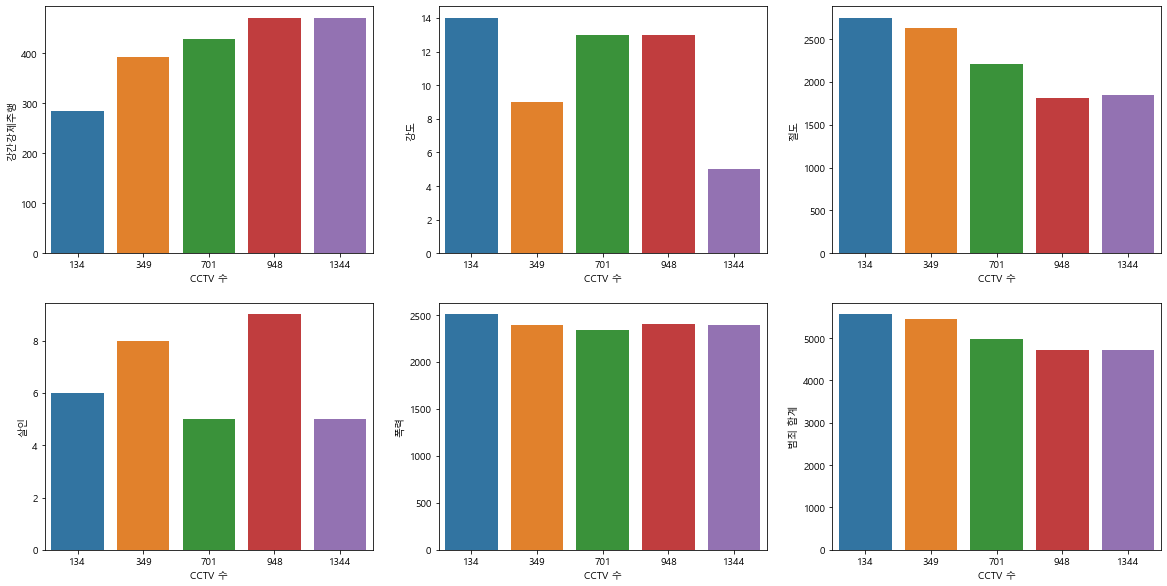

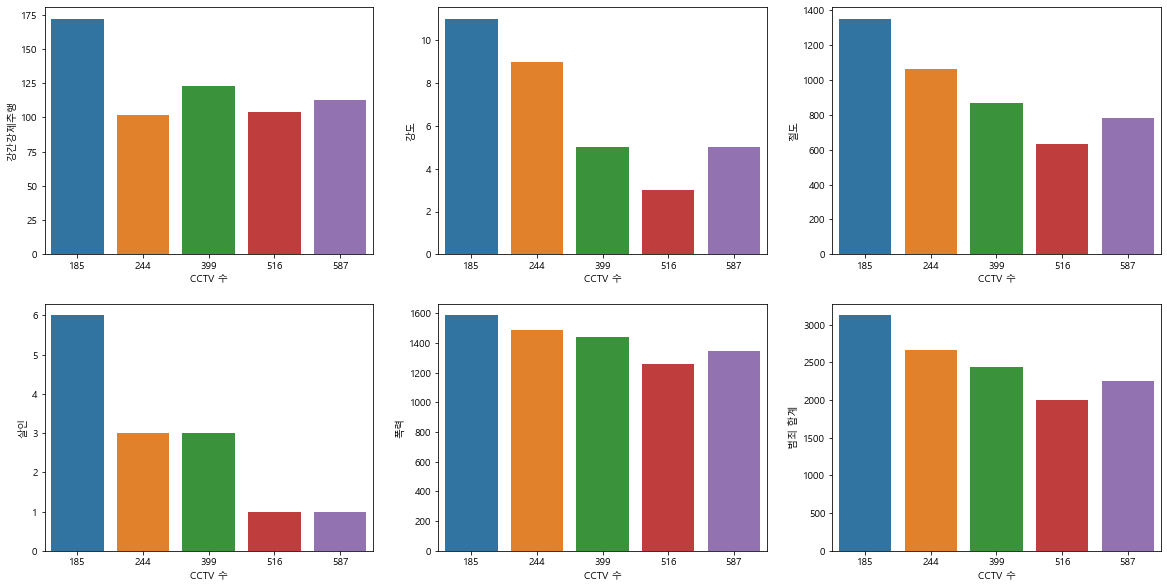

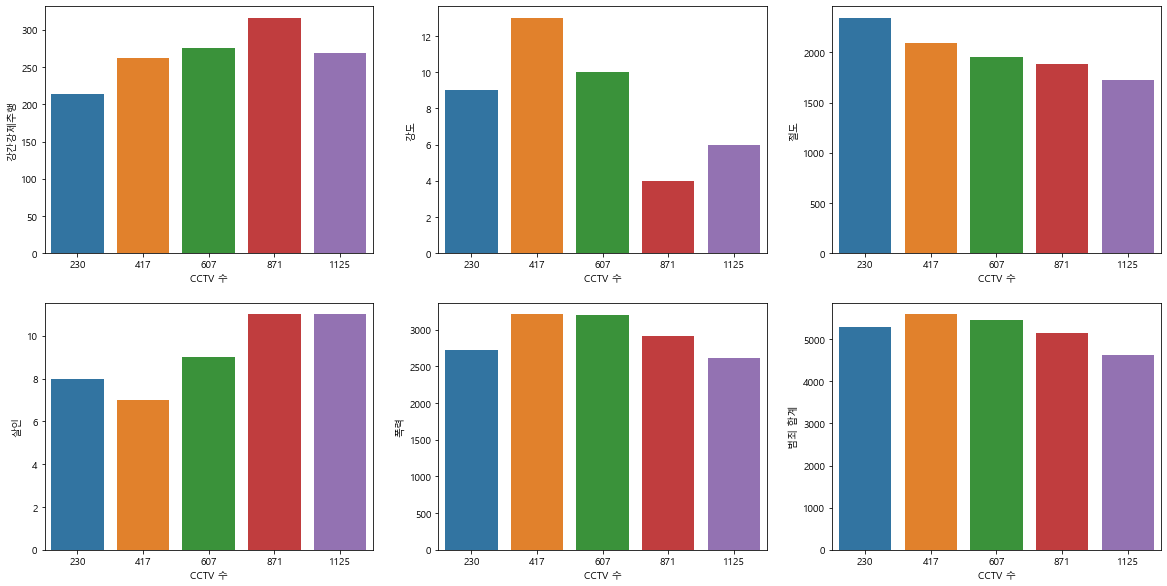

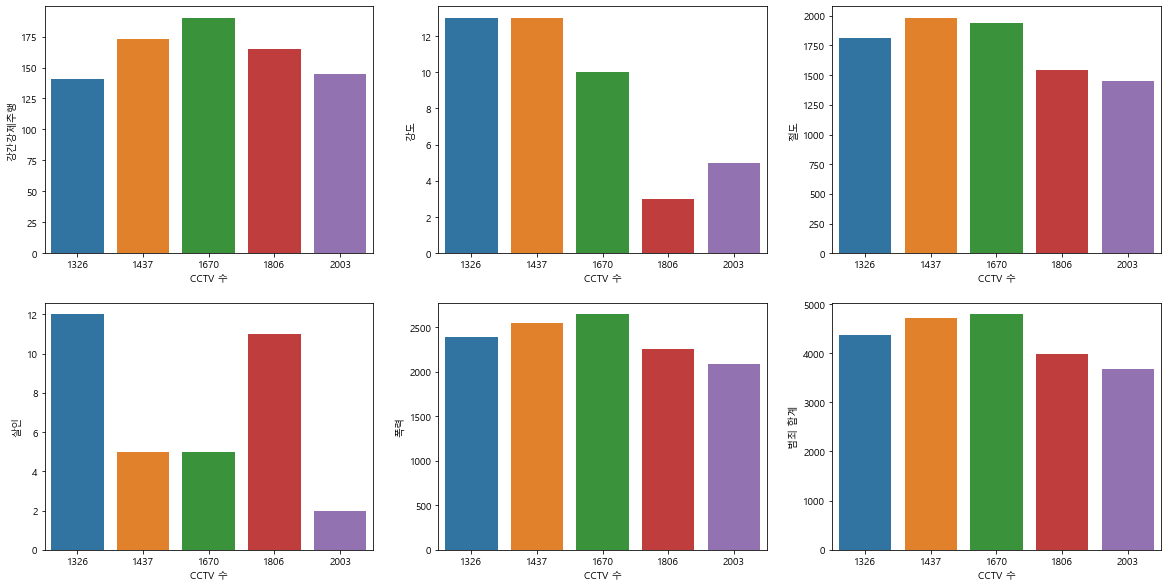

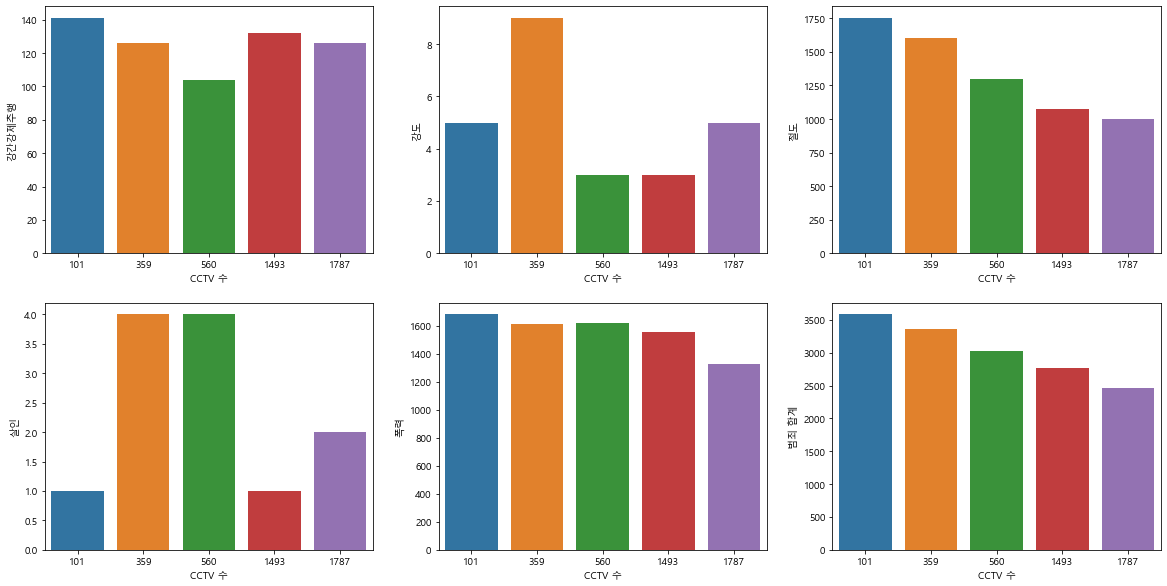

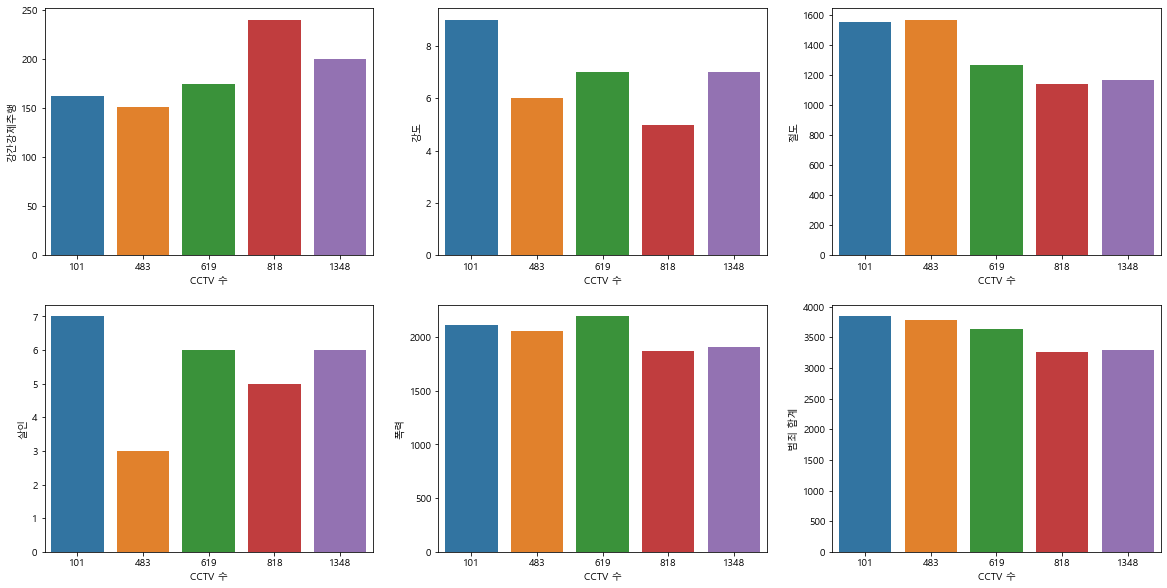

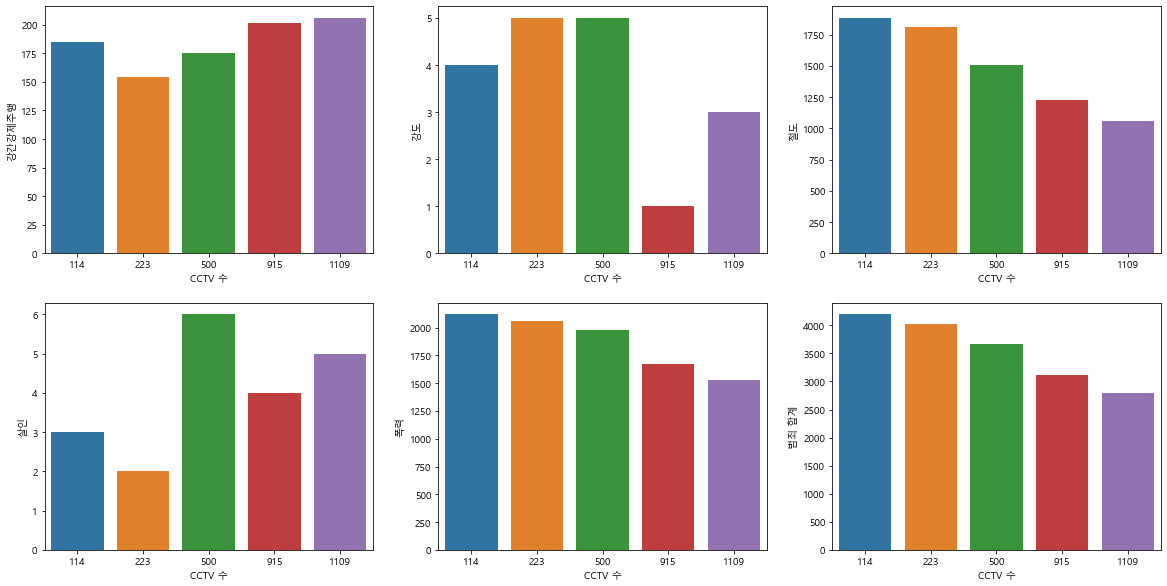

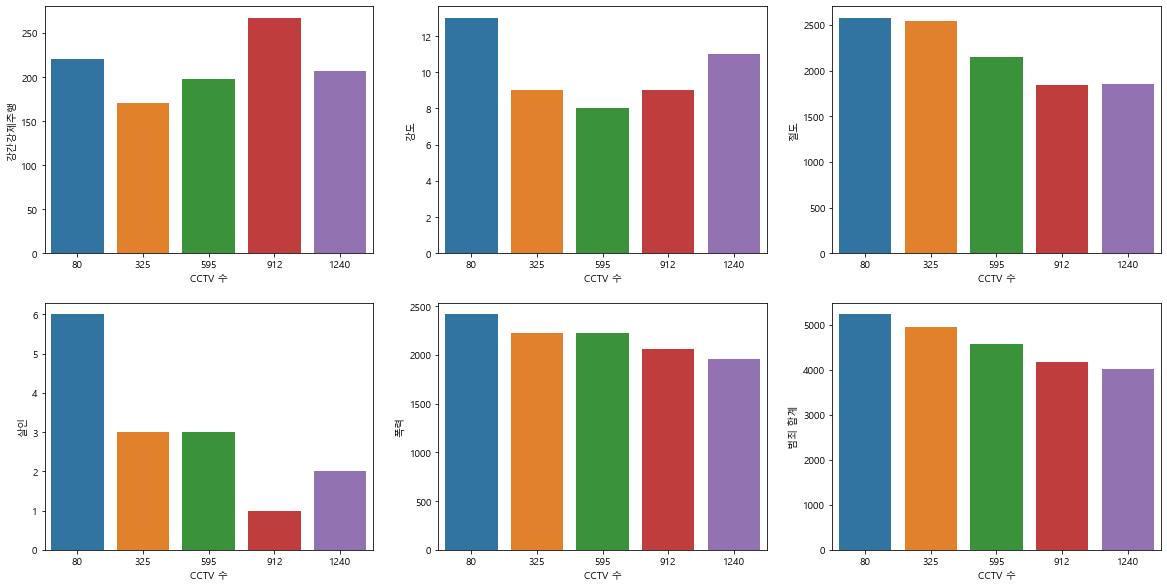

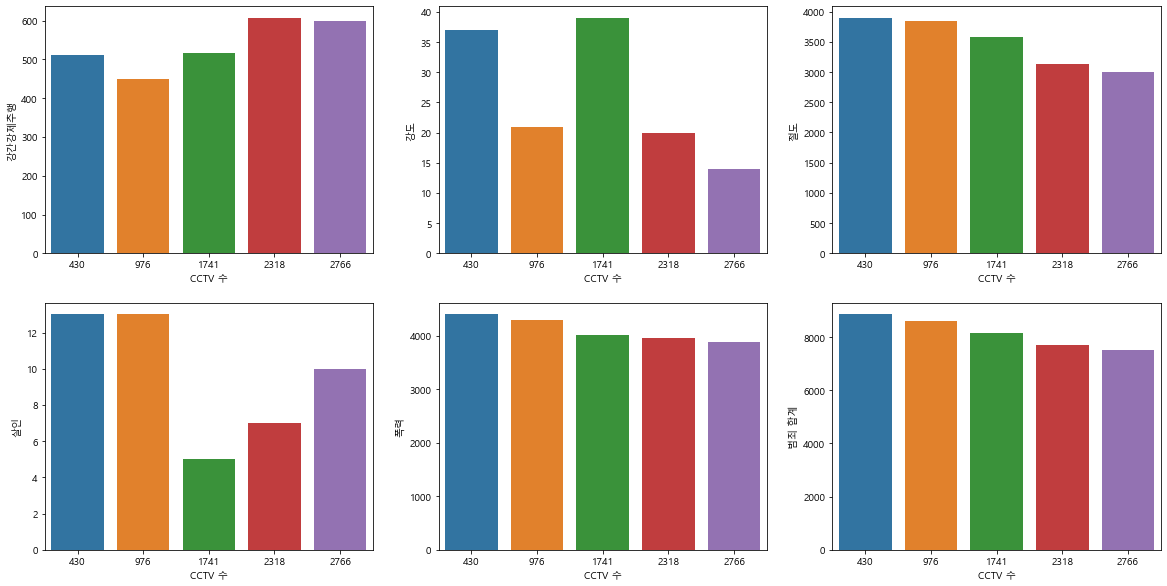

In [17]:
#구별로 그래프한거 추출
for i in seoul_area:
    #csv 파일 호출
    gdf = pd.read_csv('./seoul/'+i+'.csv', encoding='cp949',index_col='년도')
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2)
    ax3 = fig.add_subplot(2, 3, 3)
    ax4 = fig.add_subplot(2, 3, 4)
    ax5 = fig.add_subplot(2, 3, 5)
    ax6 = fig.add_subplot(2, 3, 6)


    sns.barplot(x='CCTV 수', y='강간강제추행', data=gdf, ax= ax1)
    sns.barplot(x='CCTV 수', y='강도', data=gdf, ax= ax2)
    sns.barplot(x='CCTV 수', y='절도', data=gdf, ax= ax3)
    sns.barplot(x='CCTV 수', y='살인', data=gdf, ax= ax4)
    sns.barplot(x='CCTV 수', y='폭력', data=gdf, ax= ax5)
    sns.barplot(x='CCTV 수', y='범죄 합계', data=gdf, ax= ax6)

    plt.savefig('./seoul_pic/'+i+'.png')
    
    

In [26]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 13 columns):
년도        5 non-null float64
자치구       125 non-null object
CCTV 수    125 non-null int64
세대        125 non-null int64
인구 합계     125 non-null int64
한국인       125 non-null int64
등록외국인     125 non-null int64
범죄 합계     125 non-null int64
살인        125 non-null int64
강도        125 non-null int64
강간강제추행    125 non-null int64
절도        125 non-null int64
폭력        125 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 12.8+ KB


In [5]:
#crime_kind = gdf[['강간강제추행', '강도', '살인', '절도', '폭력']]
#g = sns.pairplot(ddf, hue='자치구' )

In [146]:
ddf_corr = ddf[['10만명당CCTV수', '10만명당범죄수', 'CCTV', '강간강제추행', '강도','강도절도폭력', '단란유흥', '단란주점',
     '등록외국인', '범죄합계', '살인','살인강간', '세대', '유흥주점', '인구합계', '절도', '폭력', '한국인']].corr()
ddf_corr

,10만명당CCTV수,10만명당범죄수,CCTV,강간강제추행,강도,강도절도폭력,단란유흥,단란주점,등록외국인,범죄합계,살인,살인강간,세대,유흥주점,인구합계,절도,폭력,한국인
10만명당CCTV수,1.000000,-0.994165,0.999925,0.821269,-0.975914,-0.990598,-0.982501,-0.985277,0.680973,-0.993520,-0.861160,0.819778,0.892106,-0.962247,-0.997761,-0.969828,-0.948361,-0.998544
10만명당범죄수,-0.994165,1.000000,-0.993254,-0.872979,0.977990,0.998499,0.960721,0.964097,-0.607311,0.999054,0.897858,-0.871650,-0.874843,0.939936,0.996355,0.977229,0.956739,0.992793
CCTV,0.999925,-0.993254,1.000000,0.818158,-0.974329,-0.989938,-0.984599,-0.986616,0.687031,-0.992995,-0.861095,0.816626,0.889631,-0.965434,-0.997833,-0.970500,-0.944973,-0.998974
강간강제추행,0.821269,-0.872979,0.818158,1.000000,-0.864284,-0.890356,-0.734220,-0.720155,0.298051,-0.879113,-0.925202,0.999985,0.583667,-0.742981,-0.842108,-0.901784,-0.789334,-0.826238
강도,-0.975914,0.977990,-0.974329,-0.864284,1.000000,0.976984,0.931652,0.932205,-0.664642,0.976942,0.819787,-0.863977,-0.849182,0.915526,0.968154,0.957931,0.931578,0.969143
강도절도폭력,-0.990598,0.998499,-0.989938,-0.890356,0.976984,1.000000,0.957974,0.956613,-0.607137,0.999709,0.912629,-0.889046,-0.847109,0.944248,0.995028,0.986908,0.940955,0.991509
단란유흥,-0.982501,0.960721,-0.984599,-0.734220,0.931652,0.957974,1.000000,0.995534,-0.767491,0.963999,0.825531,-0.732075,-0.864316,0.990182,0.980107,0.950370,0.891108,0.986764
단란주점,-0.985277,0.964097,-0.986616,-0.720155,0.932205,0.956613,0.995534,1.000000,-0.738543,0.963315,0.811479,-0.718025,-0.907431,0.972563,0.980551,0.933848,0.921721,0.985461
등록외국인,0.680973,-0.607311,0.687031,0.298051,-0.664642,-0.607137,-0.767491,-0.738543,1.000000,-0.619752,-0.343375,0.297060,0.552329,-0.797741,-0.652200,-0.640187,-0.483641,-0.685853
범죄합계,-0.993520,0.999054,-0.992995,-0.879113,0.976942,0.999709,0.963999,0.963315,-0.619752,1.000000,0.906476,-0.877741,-0.855871,0.949171,0.997067,0.985409,0.943226,0.994220


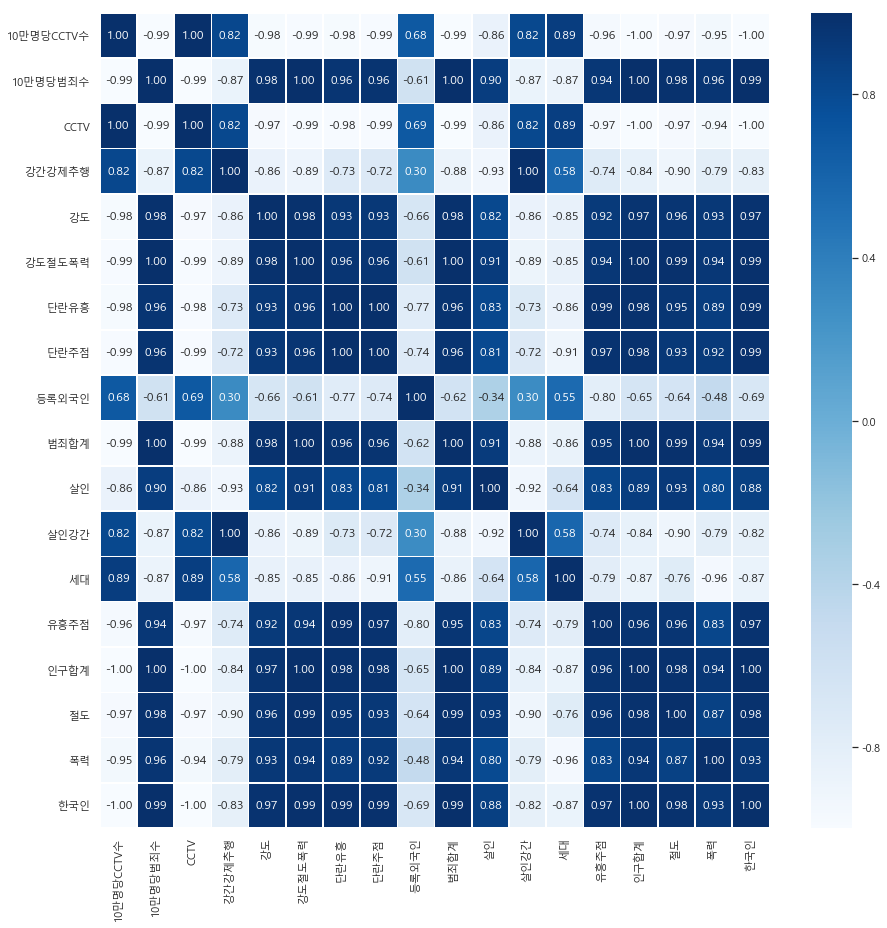

In [147]:
plt.figure(figsize=(15,15))
sns.heatmap(data = ddf_corr, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

### 각 컬럼별 지역순위

In [ ]:
#범죄 합
display(seoul_crime_10man_df_2018[['지역','범죄합']].sort_values(by=['범죄합'], axis=0, ascending=False).head(5))

#살인강간
display(seoul_crime_10man_df_2018[['지역','살인강간']].sort_values(by=['살인강간'], axis=0, ascending=False).head(5))

#강절폭
display(seoul_crime_10man_df_2018[['지역','강절폭']].sort_values(by=['강절폭'], axis=0, ascending=False).head(5))

#등록외국인수
display(seoul_crime_10man_df_2018[['지역','등록외국인']].sort_values(by=['등록외국인'], axis=0, ascending=False).head(5))

In [5]:
ddf.head(5)

,년도,지역,강도,살인,절도,폭력,강간강제추행,살인강간,강도절도폭력,범죄합계,10만명당범죄수,한국인,등록외국인,세대,인구합계,CCTV,10만명당CCTV수,단란주점,유흥주점,단란유흥
0,2014,강남구,37,13,3895,4394,512,525,8326,8851,1534,571509,5359,234324,576868,430,74,328,276,604
1,2014,강동구,10,5,2425,2804,148,153,5239,5392,1113,479586,4605,186239,484191,59,12,105,151,256
2,2014,강북구,21,6,1494,2320,189,195,3835,4030,1186,336363,3308,141139,339671,74,21,129,74,203
3,2014,강서구,9,8,2341,2717,214,222,5067,5289,907,576574,6331,230553,582906,230,39,169,114,283
4,2014,관악구,25,7,3029,3359,361,368,6413,6781,1270,515688,18120,248703,533809,487,91,100,228,328


In [13]:
ddf = pd.read_csv('./data/20200101_seoul_2014_to_2018_crime_cctv_pop_food_sum.csv')

In [118]:
ddf = ddf.pivot_table(index=['년도'],aggfunc=np.sum)
ddf.reset_index(level='년도', inplace=True)

ddf

,년도,10만명당CCTV수,10만명당범죄수,CCTV,강간강제추행,강도,강도절도폭력,단란유흥,단란주점,등록외국인,범죄합계,살인,살인강간,세대,유흥주점,인구합계,절도,폭력,한국인
0,2014,1553,34779,6248,5462,343,125054,5189,2919,257047,130674,158,5620,4192293,2270,10381261,59393,65318,10124202
1,2015,3070,33838,11920,5449,276,120789,5073,2861,272617,126401,163,5612,4196408,2212,10336877,55307,65206,10064252
2,2016,4827,31982,18604,6002,262,111689,4923,2786,272481,117839,148,6150,4192351,2137,10246055,46857,64570,9973564
3,2017,6960,29373,26090,6963,169,100730,4888,2752,267181,107835,142,7105,4213216,2136,10164740,41162,59399,9897549
4,2018,9294,27822,34827,6412,143,95393,4680,2614,276991,101948,143,6555,4249252,2066,10079887,39175,56075,9802883


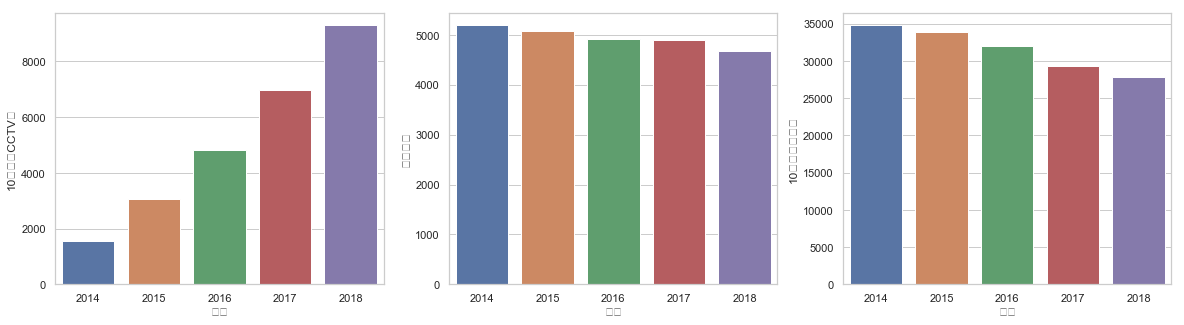

In [148]:
# 10만명당 CCTV, 단란유흥, 10만명당 범죄수
fig = plt.figure(figsize=(20,5))

sns.set(style="whitegrid")

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# sns.lineplot(x="fff" ,y="10만명당CCTV수" , data=ddf['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
# sns.lineplot(data=ddf['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax2)
# sns.lineplot(data=ddf['단란유흥'], palette="tab10", linewidth=2,ax=ax3)

sns.barplot(x=ddf['년도'] , y=ddf['10만명당CCTV수'] , ax=ax1)
sns.barplot(x=ddf['년도'] , y=ddf['단란유흥'] , ax=ax2)
sns.barplot(x=ddf['년도'] , y=ddf['10만명당범죄수'] , ax=ax3)



plt.show()
plt.close()

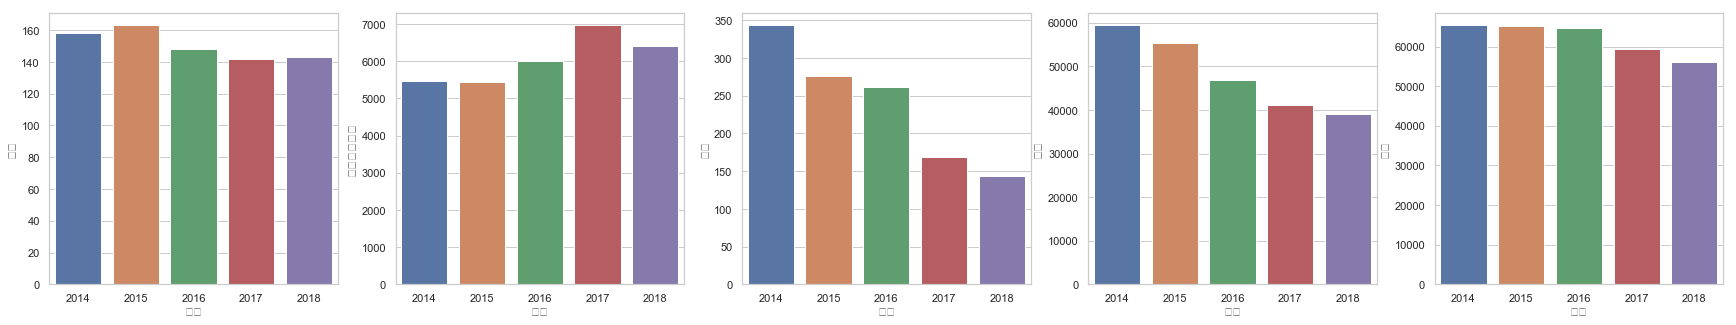

In [149]:
#5대 범죄
fig = plt.figure(figsize=(30,5))

sns.set(style="whitegrid")

ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# sns.lineplot(x="fff" ,y="10만명당CCTV수" , data=ddf['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
# sns.lineplot(data=ddf['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax2)
# sns.lineplot(data=ddf['단란유흥'], palette="tab10", linewidth=2,ax=ax3)

sns.barplot(x=ddf['년도'] , y=ddf['살인'] , ax=ax1)
sns.barplot(x=ddf['년도'] , y=ddf['강간강제추행'] , ax=ax2)
sns.barplot(x=ddf['년도'] , y=ddf['강도'] , ax=ax3)
sns.barplot(x=ddf['년도'] , y=ddf['절도'] , ax=ax4)
sns.barplot(x=ddf['년도'] , y=ddf['폭력'] , ax=ax5)



plt.show()
plt.close()

In [ ]:

fig = plt.figure(figsize=(30,5))

sns.set(style="whitegrid")

ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# sns.lineplot(x="fff" ,y="10만명당CCTV수" , data=ddf['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
# sns.lineplot(data=ddf['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax2)
# sns.lineplot(data=ddf['단란유흥'], palette="tab10", linewidth=2,ax=ax3)

sns.barplot(x=ddf['년도'] , y=ddf['살인'] , ax=ax1)
sns.barplot(x=ddf['년도'] , y=ddf['강간강제추행'] , ax=ax2)
sns.barplot(x=ddf['년도'] , y=ddf['강도'] , ax=ax3)
sns.barplot(x=ddf['년도'] , y=ddf['절도'] , ax=ax4)
sns.barplot(x=ddf['년도'] , y=ddf['폭력'] , ax=ax5)



plt.show()
plt.close()

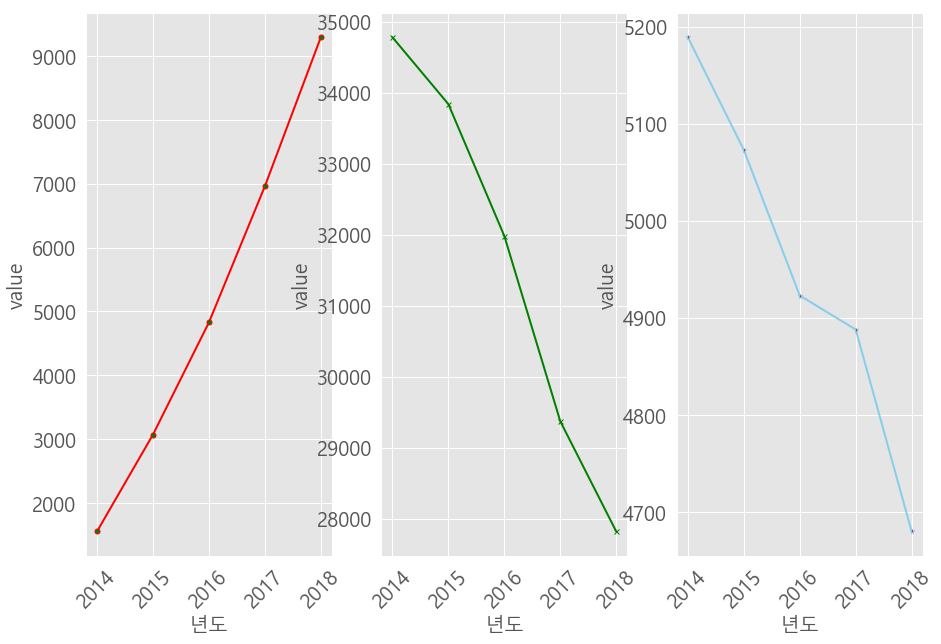

In [101]:
year = ['2014','2015','2016','2017','2018']

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 10))   

plt.style.use('ggplot') 

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


# 축이름 추가
ax1.set_xlabel('년도', size=20)
ax1.set_ylabel('value', size = 20)
ax2.set_xlabel('년도', size=20)
ax2.set_ylabel('value', size = 20)
ax3.set_xlabel('년도', size=20)
ax3.set_ylabel('value', size = 20)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(year, rotation=45)
ax2.set_xticklabels(year, rotation=45)
ax3.set_xticklabels(year, rotation=45)

# 축 눈금 라벨 크기
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax2.tick_params(axis="x", labelsize=20)
ax2.tick_params(axis="y", labelsize=20)
ax3.tick_params(axis="x", labelsize=20)
ax3.tick_params(axis="y", labelsize=20)

#plt.xlim(1,4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(year, ddf['10만명당CCTV수'], marker='o', markerfacecolor='green', 
        markersize=5, color='red', linewidth=2, label='10만명 당 CCTV 수')

ax2.plot(year, ddf['10만명당범죄수'], marker='x', markerfacecolor='blue', 
        markersize=5, color='green', linewidth=2, label='10만명 당 범죄 수')

ax3.plot(year, ddf['단란유흥'], marker='*', markerfacecolor='red', 
        markersize=5, color='skyblue', linewidth=2, label='단란주점 및 유흥주점 수')

#제목 추가
ax.set_title("범죄 및 CCTV 수", size=20)

# 범례 표시
ax.legend(loc='best')